In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
df=pd.read_csv('/content/supply_chain_up-to-date.csv')
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,cosmetics,SKU25,45.031394,6818,6004,2153.559994,Non-binary,4197,1309,5569,...,Mumbai,1459,9257,8724,23.095473,Pass,2.280997,Air,Route B,826.291432
1,haircare,SKU35,76.179344,3745,3448,4202.752472,Non-binary,1236,6825,1474,...,Kolkata,6752,3580,4226,57.433682,Pending,1.944682,Rail,Route C,913.451188
2,haircare,SKU8,49.948851,2264,2133,7470.234909,Male,5956,4142,7422,...,Delhi,7960,7728,4227,48.553769,Pending,2.687439,Sea,Route C,702.165347
3,cosmetics,SKU82,94.011636,4304,1546,9394.496928,Non-binary,2395,9339,5159,...,Kolkata,5197,3812,7370,76.543239,Pass,1.198536,Sea,Route C,772.415193
4,skincare,SKU37,54.443988,9456,5288,1478.561325,Non-binary,3713,1255,8621,...,Delhi,2700,9487,8502,47.407622,Pending,2.720945,Air,Route A,790.017533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,cosmetics,SKU45,84.868711,1288,7626,1367.302502,Non-binary,4812,9207,8367,...,Mumbai,6044,3216,1858,20.625081,Fail,2.401906,Rail,Route C,286.892840
896,cosmetics,SKU56,85.311349,4618,3402,1846.248142,Female,9405,1572,6969,...,Bangalore,9333,2114,2454,4.277209,Pending,0.673328,Sea,Route B,536.900979
897,cosmetics,SKU83,84.631061,6469,9913,8344.020942,Female,1711,7329,5022,...,Chennai,1624,1662,1269,47.801682,Pending,4.286716,Sea,Route A,803.929795
898,skincare,SKU31,5.327235,7253,4241,4123.607448,Female,4555,4810,8544,...,Kolkata,9298,7937,6712,31.753501,Fail,3.836415,Road,Route A,696.590367


In [ ]:
df.head(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,cosmetics,SKU25,45.031394,6818,6004,2153.559994,Non-binary,4197,1309,5569,...,Mumbai,1459,9257,8724,23.095473,Pass,2.280997,Air,Route B,826.291432
1,haircare,SKU35,76.179344,3745,3448,4202.752472,Non-binary,1236,6825,1474,...,Kolkata,6752,3580,4226,57.433682,Pending,1.944682,Rail,Route C,913.451188
2,haircare,SKU8,49.948851,2264,2133,7470.234909,Male,5956,4142,7422,...,Delhi,7960,7728,4227,48.553769,Pending,2.687439,Sea,Route C,702.165347
3,cosmetics,SKU82,94.011636,4304,1546,9394.496928,Non-binary,2395,9339,5159,...,Kolkata,5197,3812,7370,76.543239,Pass,1.198536,Sea,Route C,772.415193
4,skincare,SKU37,54.443988,9456,5288,1478.561325,Non-binary,3713,1255,8621,...,Delhi,2700,9487,8502,47.407622,Pending,2.720945,Air,Route A,790.017533
5,cosmetics,SKU60,76.279198,8093,7403,1860.689287,Female,2831,2052,8939,...,Mumbai,2727,1979,9430,60.628516,Pending,4.632860,Air,Route A,454.052111
6,cosmetics,SKU52,80.657673,2500,8945,4339.904275,Non-binary,2558,9008,9568,...,Chennai,6804,6011,9544,28.195700,Pass,1.707461,Road,Route B,276.883883
7,haircare,SKU21,93.638418,9864,4840,9106.518009,Male,4859,5132,7750,...,Kolkata,5470,2099,8183,6.644845,Pending,1.369790,Sea,Route A,161.019027
8,cosmetics,SKU3,45.795697,9710,9128,2569.542809,Male,2957,5061,2779,...,Mumbai,4405,5794,9849,39.567801,Pending,3.604878,Air,Route A,577.241015
9,skincare,SKU18,84.966245,1080,6698,4101.352930,Non-binary,2147,7282,8901,...,Bangalore,6750,3146,8091,82.155888,Pass,4.813752,Air,Route A,174.494291


In [ ]:
#Inventory Optimization (Predict Stock Levels) 📦
#Objective: Predict stock levels to ensure optimal inventory and prevent over/under-stocking.
#Target Variable: Stock levels
#Key Features:
#Number of products sold, Revenue generated, Order quantities, Lead times, Supplier name, Manufacturing lead time, Production volumes

In [ ]:
'''Feature Selection (Key Predictors for Stock Levels)
Demand-related: Number of products sold, Revenue generated, Order quantities
Supply-related: Lead times, Supplier name, Manufacturing lead time, Production volumes
Logistics-related: Shipping times, Shipping carriers, Shipping costs, Transportation modes, Routes
Product-related: Product type, Price, Availability'''

'Feature Selection (Key Predictors for Stock Levels)\nDemand-related: Number of products sold, Revenue generated, Order quantities\nSupply-related: Lead times, Supplier name, Manufacturing lead time, Production volumes\nLogistics-related: Shipping times, Shipping carriers, Shipping costs, Transportation modes, Routes\nProduct-related: Product type, Price, Availability'

In [ ]:
goal=['stocklevels']

In [ ]:
feature_selection=['Number of products sold', 'Revenue generated', 'Order quantities',
                   'Lead times, Supplier name', 'Manufacturing lead time', 'Production volumes',
                   'Shipping times', 'Shipping carriers', 'Shipping costs', 'Transportation modes', 'Routes',
                   'Product type', 'Price', 'Availability'

]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             900 non-null    object 
 1   SKU                      900 non-null    object 
 2   Price                    900 non-null    float64
 3   Availability             900 non-null    int64  
 4   Number of products sold  900 non-null    int64  
 5   Revenue generated        900 non-null    float64
 6   Customer demographics    900 non-null    object 
 7   Stock levels             900 non-null    int64  
 8   Lead times               900 non-null    int64  
 9   Order quantities         900 non-null    int64  
 10  Shipping times           900 non-null    int64  
 11  Shipping carriers        900 non-null    object 
 12  Shipping costs           900 non-null    float64
 13  Supplier name            900 non-null    object 
 14  Location                 9

In [ ]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,50.446429,5639.454444,5550.604444,5347.193052,5579.048889,5466.258889,5509.871111,5411.842222,5.441525,5438.047778,5540.678889,5460.981111,49.333062,2.477011,549.668008
std,27.867943,2592.253899,2603.807586,2581.931270,2604.305551,2646.274332,2611.249039,2619.338806,2.633082,2653.394929,2581.906668,2536.338744,28.847173,1.435564,260.297556
min,1.855065,1004.000000,1000.000000,1065.002242,1034.000000,1017.000000,1003.000000,1018.000000,1.024281,1000.000000,1001.000000,1007.000000,1.102868,0.020854,104.078733
25%,25.424176,3417.500000,3348.500000,3011.636626,3270.750000,3053.250000,3220.500000,3118.250000,3.013810,3123.500000,3316.000000,3335.000000,23.601800,1.244464,328.249146
50%,51.591084,5551.500000,5486.000000,5300.367375,5763.000000,5416.000000,5586.500000,5313.500000,5.534668,5395.500000,5573.000000,5453.500000,48.769318,2.389474,569.556222
75%,75.003548,7919.000000,7840.500000,7581.354146,7801.750000,7766.500000,7766.500000,7686.250000,7.763616,7726.250000,7767.500000,7547.250000,74.425806,3.726218,768.466143
max,99.065500,9996.000000,9991.000000,9843.823517,9995.000000,9995.000000,9993.000000,9995.000000,9.917501,9994.000000,9985.000000,9977.000000,99.445028,4.938780,993.092933


In [ ]:
df.isna().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


In [ ]:
# Drop Unnecessary Columns
df.drop(columns=["SKU"], inplace=True)

In [ ]:
df.drop(columns=['Inspection results'], inplace=True)

In [ ]:
unique_counts = df.nunique()
print(unique_counts)


Product type                 3
Price                      900
Availability               900
Number of products sold    900
Revenue generated          900
Customer demographics        4
Stock levels               900
Lead times                 900
Order quantities           900
Shipping times             900
Shipping carriers            3
Shipping costs             900
Supplier name                5
Location                     5
Lead time                  900
Production volumes         900
Manufacturing lead time    900
Manufacturing costs        900
Defect rates               900
Transportation modes         4
Routes                       3
Costs                      900
dtype: int64


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)


Categorical Columns: ['Product type', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 'Transportation modes', 'Routes']


In [ ]:
# Encode Categorical Variables
categorical_cols = ["Product type", "Supplier name", "Location", "Shipping carriers", "Transportation modes" ,  "Routes", "Product type", "Availability"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Store encoders for inverse transformation if needed

In [ ]:
df

,Product type,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,...,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Transportation modes,Routes,Costs
0,0,45.031394,567,6004,2153.559994,Non-binary,4197,1309,5569,7041,...,2,4,1459,9257,8724,23.095473,2.280997,0,1,826.291432
1,1,76.179344,259,3448,4202.752472,Non-binary,1236,6825,1474,8802,...,1,3,6752,3580,4226,57.433682,1.944682,1,2,913.451188
2,1,49.948851,111,2133,7470.234909,Male,5956,4142,7422,7924,...,2,2,7960,7728,4227,48.553769,2.687439,3,2,702.165347
3,0,94.011636,309,1546,9394.496928,Non-binary,2395,9339,5159,6624,...,4,3,5197,3812,7370,76.543239,1.198536,3,2,772.415193
4,2,54.443988,830,5288,1478.561325,Non-binary,3713,1255,8621,9184,...,0,2,2700,9487,8502,47.407622,2.720945,0,0,790.017533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0,84.868711,25,7626,1367.302502,Non-binary,4812,9207,8367,3932,...,1,4,6044,3216,1858,20.625081,2.401906,1,2,286.892840
896,0,85.311349,339,3402,1846.248142,Female,9405,1572,6969,7046,...,2,0,9333,2114,2454,4.277209,0.673328,3,1,536.900979
897,0,84.631061,538,9913,8344.020942,Female,1711,7329,5022,9723,...,2,1,1624,1662,1269,47.801682,4.286716,3,0,803.929795
898,2,5.327235,613,4241,4123.607448,Female,4555,4810,8544,2236,...,4,3,9298,7937,6712,31.753501,3.836415,2,0,696.590367


In [ ]:
# Initialize the LabelEncoder
le_routes = LabelEncoder()
# Apply Label Encoding to 'Route' column
df["Routes"] = le_routes.fit_transform(df["Routes"])

In [ ]:
df

,Product type,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,...,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Transportation modes,Routes,Costs
0,0,45.031394,567,6004,2153.559994,Non-binary,4197,1309,5569,7041,...,2,4,1459,9257,8724,23.095473,2.280997,0,1,826.291432
1,1,76.179344,259,3448,4202.752472,Non-binary,1236,6825,1474,8802,...,1,3,6752,3580,4226,57.433682,1.944682,1,2,913.451188
2,1,49.948851,111,2133,7470.234909,Male,5956,4142,7422,7924,...,2,2,7960,7728,4227,48.553769,2.687439,3,2,702.165347
3,0,94.011636,309,1546,9394.496928,Non-binary,2395,9339,5159,6624,...,4,3,5197,3812,7370,76.543239,1.198536,3,2,772.415193
4,2,54.443988,830,5288,1478.561325,Non-binary,3713,1255,8621,9184,...,0,2,2700,9487,8502,47.407622,2.720945,0,0,790.017533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0,84.868711,25,7626,1367.302502,Non-binary,4812,9207,8367,3932,...,1,4,6044,3216,1858,20.625081,2.401906,1,2,286.892840
896,0,85.311349,339,3402,1846.248142,Female,9405,1572,6969,7046,...,2,0,9333,2114,2454,4.277209,0.673328,3,1,536.900979
897,0,84.631061,538,9913,8344.020942,Female,1711,7329,5022,9723,...,2,1,1624,1662,1269,47.801682,4.286716,3,0,803.929795
898,2,5.327235,613,4241,4123.607448,Female,4555,4810,8544,2236,...,4,3,9298,7937,6712,31.753501,3.836415,2,0,696.590367


**Feature** **Engineering**

In [ ]:
# Create Lag Features (Previous stock levels)
df['Stock_Level_t-1'] = df['Stock levels'].shift(1)
df['Stock_Level_t-2'] = df['Stock levels'].shift(2)

# Check for missing values generated due to shift (drop if needed)
df.dropna(subset=['Stock_Level_t-1', 'Stock_Level_t-2'], inplace=True)

print(df[['Stock levels', 'Stock_Level_t-1', 'Stock_Level_t-2']].head())


   Stock levels  Stock_Level_t-1  Stock_Level_t-2
2          5956           1236.0           4197.0
3          2395           5956.0           1236.0
4          3713           2395.0           5956.0
5          2831           3713.0           2395.0
6          2558           2831.0           3713.0


In [ ]:
# Calculate Rolling Averages of Stock Levels (3-day, 7-day windows)
df['Stock_Level_MA_3'] = df['Stock levels'].rolling(window=3).mean()
df['Stock_Level_MA_7'] = df['Stock levels'].rolling(window=7).mean()

# Check for missing values due to rolling window (drop if needed)
df.dropna(subset=['Stock_Level_MA_3', 'Stock_Level_MA_7'], inplace=True)

print(df[['Stock levels', 'Stock_Level_MA_3', 'Stock_Level_MA_7']].head())


    Stock levels  Stock_Level_MA_3  Stock_Level_MA_7
8           2957       3458.000000       3609.857143
9           2147       3321.000000       3065.714286
10          8093       4399.000000       3879.714286
11          7061       5767.000000       4358.000000
12          7372       7508.666667       5006.714286


In [ ]:
# Assume Safety Stock is a constant value (can be customized based on your data)
safety_stock = 100  # Example, can be adjusted

# Calculate Lead Time Demand: Average daily demand * Lead time (Assumed here)
df['Lead_Time_Demand'] = df['Lead times'] * df['Number of products sold'].mean() / 30  # Example, for a monthly demand

# Reorder Point Calculation: Lead Time Demand + Safety Stock
df['Reorder_Point'] = df['Lead_Time_Demand'] + safety_stock

print(df[['Lead_Time_Demand', 'Reorder_Point']].head())


    Lead_Time_Demand  Reorder_Point
8       9.372944e+05   9.373944e+05
9       1.348622e+06   1.348722e+06
10      5.907862e+05   5.908862e+05
11      2.244617e+05   2.245617e+05
12      7.628365e+05   7.629365e+05


In [ ]:
# Stock Turnover Ratio = Revenue generated / Average Stock Level
df['Avg_Stock_Level'] = (df['Stock levels'] + df['Stock_Level_t-1']) / 2  # Calculate average stock level
df['Stock_Turnover_Ratio'] = df['Revenue generated'] / df['Avg_Stock_Level']

print(df[['Revenue generated', 'Avg_Stock_Level', 'Stock_Turnover_Ratio']].head())


    Revenue generated  Avg_Stock_Level  Stock_Turnover_Ratio
8         2569.542809           3908.0              0.657508
9         4101.352930           2552.0              1.607113
10        4624.913156           5120.0              0.903303
11        1482.953894           7577.0              0.195718
12        9378.371659           7216.5              1.299573


In [ ]:
# DIO = (Average Stock Level / Cost of Goods Sold per day) * 365
# Here, assuming an average COGS per day can be derived from total revenue (replace with actual if available)

df['COGS_per_day'] = df['Revenue generated'] / 30  # Example, assuming monthly revenue
df['DIO'] = (df['Avg_Stock_Level'] / df['COGS_per_day']) * 30  # Monthly DIO (adjust as needed)

print(df[['Avg_Stock_Level', 'COGS_per_day', 'DIO']].head())


    Avg_Stock_Level  COGS_per_day          DIO
8            3908.0     85.651427  1368.803815
9            2552.0    136.711764   560.010328
10           5120.0    154.163772   996.343033
11           7577.0     49.431796  4598.457192
12           7216.5    312.612389   692.534934


In [ ]:
df.head(5)

,Product type,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,...,Stock_Level_t-1,Stock_Level_t-2,Stock_Level_MA_3,Stock_Level_MA_7,Lead_Time_Demand,Reorder_Point,Avg_Stock_Level,Stock_Turnover_Ratio,COGS_per_day,DIO
8,0,45.795697,859,9128,2569.542809,Male,2957,5061,2779,2188,...,4859.0,2558.0,3458.000000,3609.857143,9.372944e+05,9.373944e+05,3908.0,0.657508,85.651427,1368.803815
9,2,84.966245,4,6698,4101.352930,Non-binary,2147,7282,8901,9120,...,2957.0,4859.0,3321.000000,3065.714286,1.348622e+06,1.348722e+06,2552.0,1.607113,136.711764,560.010328
10,2,46.659883,885,1668,4624.913156,Unknown,8093,3190,1503,2783,...,2147.0,2957.0,4399.000000,3879.714286,5.907862e+05,5.908862e+05,5120.0,0.903303,154.163772,996.343033
11,0,75.900319,70,8372,1482.953894,Male,7061,1212,9029,1338,...,8093.0,2147.0,5767.000000,4358.000000,2.244617e+05,2.245617e+05,7577.0,0.195718,49.431796,4598.457192
12,0,31.077806,18,1068,9378.371659,Female,7372,4119,4101,8152,...,7061.0,8093.0,7508.666667,5006.714286,7.628365e+05,7.629365e+05,7216.5,1.299573,312.612389,692.534934


In [ ]:
df['Product type']

,Product type
8,0
9,2
10,2
11,0
12,0
...,...
895,0
896,0
897,0
898,2


In [ ]:
pt=df['Product type'].iloc[0]
print("Product type at Index 0:", pt)

Product type at Index 0: 0


In [ ]:
# Create a label encoder
le = LabelEncoder()

# Assuming 'Gender' is the column you want to encode
df['Customer demographics'] = le.fit_transform(df['Customer demographics'])

In [ ]:
df['Customer demographics']

,Customer demographics
8,1
9,2
10,3
11,1
12,0
...,...
895,2
896,0
897,0
898,0


In [ ]:
feature_selection =['Product type', 'Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Customer demographics', 'Lead times', 'Order quantities',
                    'Shipping times', 'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
                    'Defect rates', 'Transportation modes', 'Routes', 'Costs', 'Stock_Level_t-1', 'Stock_Level_t-2', 'Stock_Level_MA_3', 'Stock_Level_MA_7', 'Lead_Time_Demand', 'Reorder_Point',
                    'Avg_Stock_Level', 'Stock_Turnover_Ratio', 'COGS_per_day', 'DIO']


In [ ]:
supplier_name_at_index_0 = df['Supplier name'].iloc[0]
print("Supplier Name at Index 0:", supplier_name_at_index_0)

Supplier Name at Index 0: 1


In [ ]:
carriers=df['Shipping carriers'].iloc[0]
print("Shipping carriers at Index 0:", carriers)

Shipping carriers at Index 0: 0


In [ ]:
tr=df['Transportation modes'].iloc[0]
print("Transportation modes at Index 0:", tr)

Transportation modes at Index 0: 0


In [ ]:
! pip install --upgrade scikit-learn


In [ ]:
! pip install --upgrade xgboost


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load and preprocess the data (assuming df is your dataset)
# Example: df contains columns: 'sales', 'demand', 'lead_time', 'seasonality', 'stock_levels'

# Data Preprocessing
X = df.drop(columns=['Stock levels'])  # Features (e.g., 'sales', 'demand', etc.)
y = df['Stock levels']  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict stock levels
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared (R²): {r2}")

# Further improvements could include hyperparameter tuning, feature engineering, etc.


Mean Squared Error: 120535.75641396646
Root Mean Squared Error: 347.18259808631893
Mean Absolute Error: 276.1060893854749
R-squared (R²): 0.9807741583904248


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your dataset is in X (features) and y (target)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% for training, 20% for temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 50% of 20% for validation, 50% for testing


In [ ]:
import xgboost
print(xgboost.__version__)


2.1.4


In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared (R²): {r2}")



Mean Squared Error: 96954.9296875
Root Mean Squared Error: 311.3758656150152
Mean Absolute Error: 250.49465942382812
R-squared (R²): 0.9849924445152283


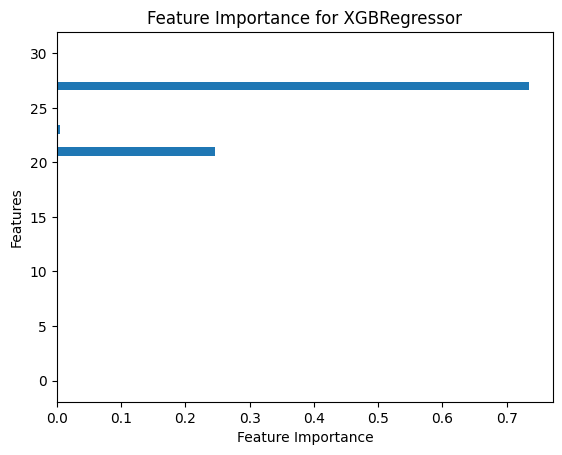

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance
importance = model.feature_importances_

# Plot feature importance
plt.barh(range(len(importance)), importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for XGBRegressor')
plt.show()


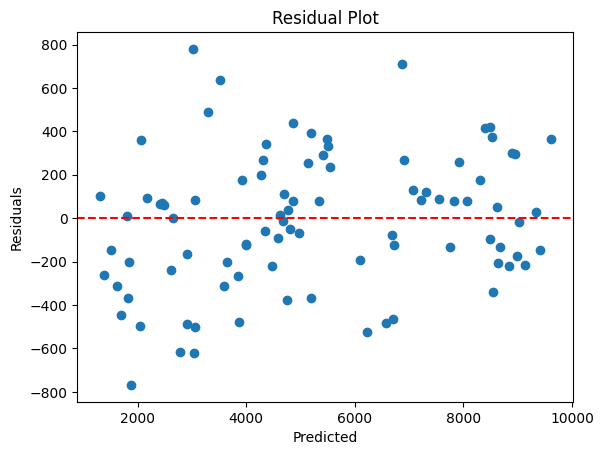

In [ ]:
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
import pickle

# Assuming 'model' is your trained machine learning model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!


In [ ]:
print("Training Data Columns: ", X_train.columns)
print("Test Data Columns: ", X_test.columns)
print("Number of Features in Train Data: ", X_train.shape[1])
print("Number of Features in Test Data: ", X_test.shape[1])


Training Data Columns:  Index(['Product type', 'Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Customer demographics', 'Lead times',
       'Order quantities', 'Shipping times', 'Shipping carriers',
       'Shipping costs', 'Supplier name', 'Location', 'Lead time',
       'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
       'Defect rates', 'Transportation modes', 'Routes', 'Costs',
       'Stock_Level_t-1', 'Stock_Level_t-2', 'Stock_Level_MA_3',
       'Stock_Level_MA_7', 'Lead_Time_Demand', 'Reorder_Point',
       'Avg_Stock_Level', 'Stock_Turnover_Ratio', 'COGS_per_day', 'DIO'],
      dtype='object')
Test Data Columns:  Index(['Product type', 'Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Customer demographics', 'Lead times',
       'Order quantities', 'Shipping times', 'Shipping carriers',
       'Shipping costs', 'Supplier name', 'Location', 'Lead time',
       'Production volumes', 'Manufa

In [ ]:
df.iloc[0]

,8
Product type,0.000000
Price,45.795697
Availability,859.000000
Number of products sold,9128.000000
Revenue generated,2569.542809
Customer demographics,1.000000
Stock levels,2957.000000
Lead times,5061.000000
Order quantities,2779.000000
Shipping times,2188.000000


In [ ]:
print("Model was trained with features:", list(X_train.columns))
print("Total features:", len(X_train.columns))


Model was trained with features: ['Product type', 'Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Customer demographics', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Defect rates', 'Transportation modes', 'Routes', 'Costs', 'Stock_Level_t-1', 'Stock_Level_t-2', 'Stock_Level_MA_3', 'Stock_Level_MA_7', 'Lead_Time_Demand', 'Reorder_Point', 'Avg_Stock_Level', 'Stock_Turnover_Ratio', 'COGS_per_day', 'DIO']
Total features: 31
